# <Font color = navy> Ocean Oxygen Levels and Projected Changes 

## <font color= navy> Rowan Rexrode ||| Tup88296@temple.edu

### <font color= navy> Welcome!
Detail ocean deoxygenation, what ssp585 and ssp245 are representative of, why we want to understand changing oxygen levels in the ocean and other definitions that could be useful. Include a visualization of the different ssp senarios. 
https://www.ipcc.ch/srocc/chapter/glossary/
"Ocean deoxygenation

The loss of oxygen in the ocean. It results from ocean warming, which reduces oxygen solubility and increases oxygen consumption and stratification, thereby reducing the mixing of oxygen into the ocean interior. Deoxygenation can also be exacerbated by the addition of excess nutrients in the coastal zon"
e.

In [93]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import cartopy.crs as ccrs

In [ ]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 

In [ ]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [33]:
google_cloud_cmip6

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [34]:
gfdl_esm4_thetao_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'thetao' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [35]:
gfdl_esm4_do2_585 = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [36]:
gfdl_esm4_do2_585

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
11670,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [37]:
gfdl_esm4_do2_245 = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [38]:
gfdl_esm4_do2_585

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
11670,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [39]:
gfdl_esm4_o2_585 = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [40]:
gfdl_esm4_o2_585

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
11655,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [41]:
gfdl_esm4_o2_245 = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [42]:
gfdl_esm4_o2_245

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15189,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [43]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [44]:
zstore_esm4_do2_585 = gfdl_esm4_do2_585.zstore.values[-1]
zstore_esm4_do2_585

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Omon/o2/gr/v20180701/'

In [45]:
zstore_esm4_do2_245 = gfdl_esm4_do2_245.zstore.values[-1]
zstore_esm4_do2_245

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp245/r1i1p1f1/Omon/o2/gr/v20180701/'

In [46]:
zstore_esm4_o2_585 = gfdl_esm4_o2_585.zstore.values[-1]
zstore_esm4_o2_585

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Omon/o2sat/gr/v20180701/'

In [47]:
zstore_esm4_o2_245 = gfdl_esm4_o2_245.zstore.values[-1]
zstore_esm4_o2_245

'gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp245/r1i1p1f1/Omon/o2sat/gr/v20180701/'

In [48]:
# create a mutable-mapping-style interface to the store
mapper_esm4_do2_585 = gcs.get_mapper(zstore_esm4_do2_585)
# open the dataset using xarray and zarr
gfdl_esm4_do2_585 = xr.open_zarr(mapper_esm4_do2_585, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_do2_585

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [49]:
# create a mutable-mapping-style interface to the store
mapper_esm4_do2_245 = gcs.get_mapper(zstore_esm4_do2_245)
# open the dataset using xarray and zarr
gfdl_esm4_do2_245 = xr.open_zarr(mapper_esm4_do2_245, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_do2_245

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [50]:
# create a mutable-mapping-style interface to the store
mapper_esm4_o2_585 = gcs.get_mapper(zstore_esm4_o2_585)
# open the dataset using xarray and zarr
gfdl_esm4_o2_585 = xr.open_zarr(mapper_esm4_o2_585, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_o2_585

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [51]:
# create a mutable-mapping-style interface to the store
mapper_esm4_o2_245 = gcs.get_mapper(zstore_esm4_o2_245)
# open the dataset using xarray and zarr
gfdl_esm4_o2_245 = xr.open_zarr(mapper_esm4_o2_245, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_o2_245

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

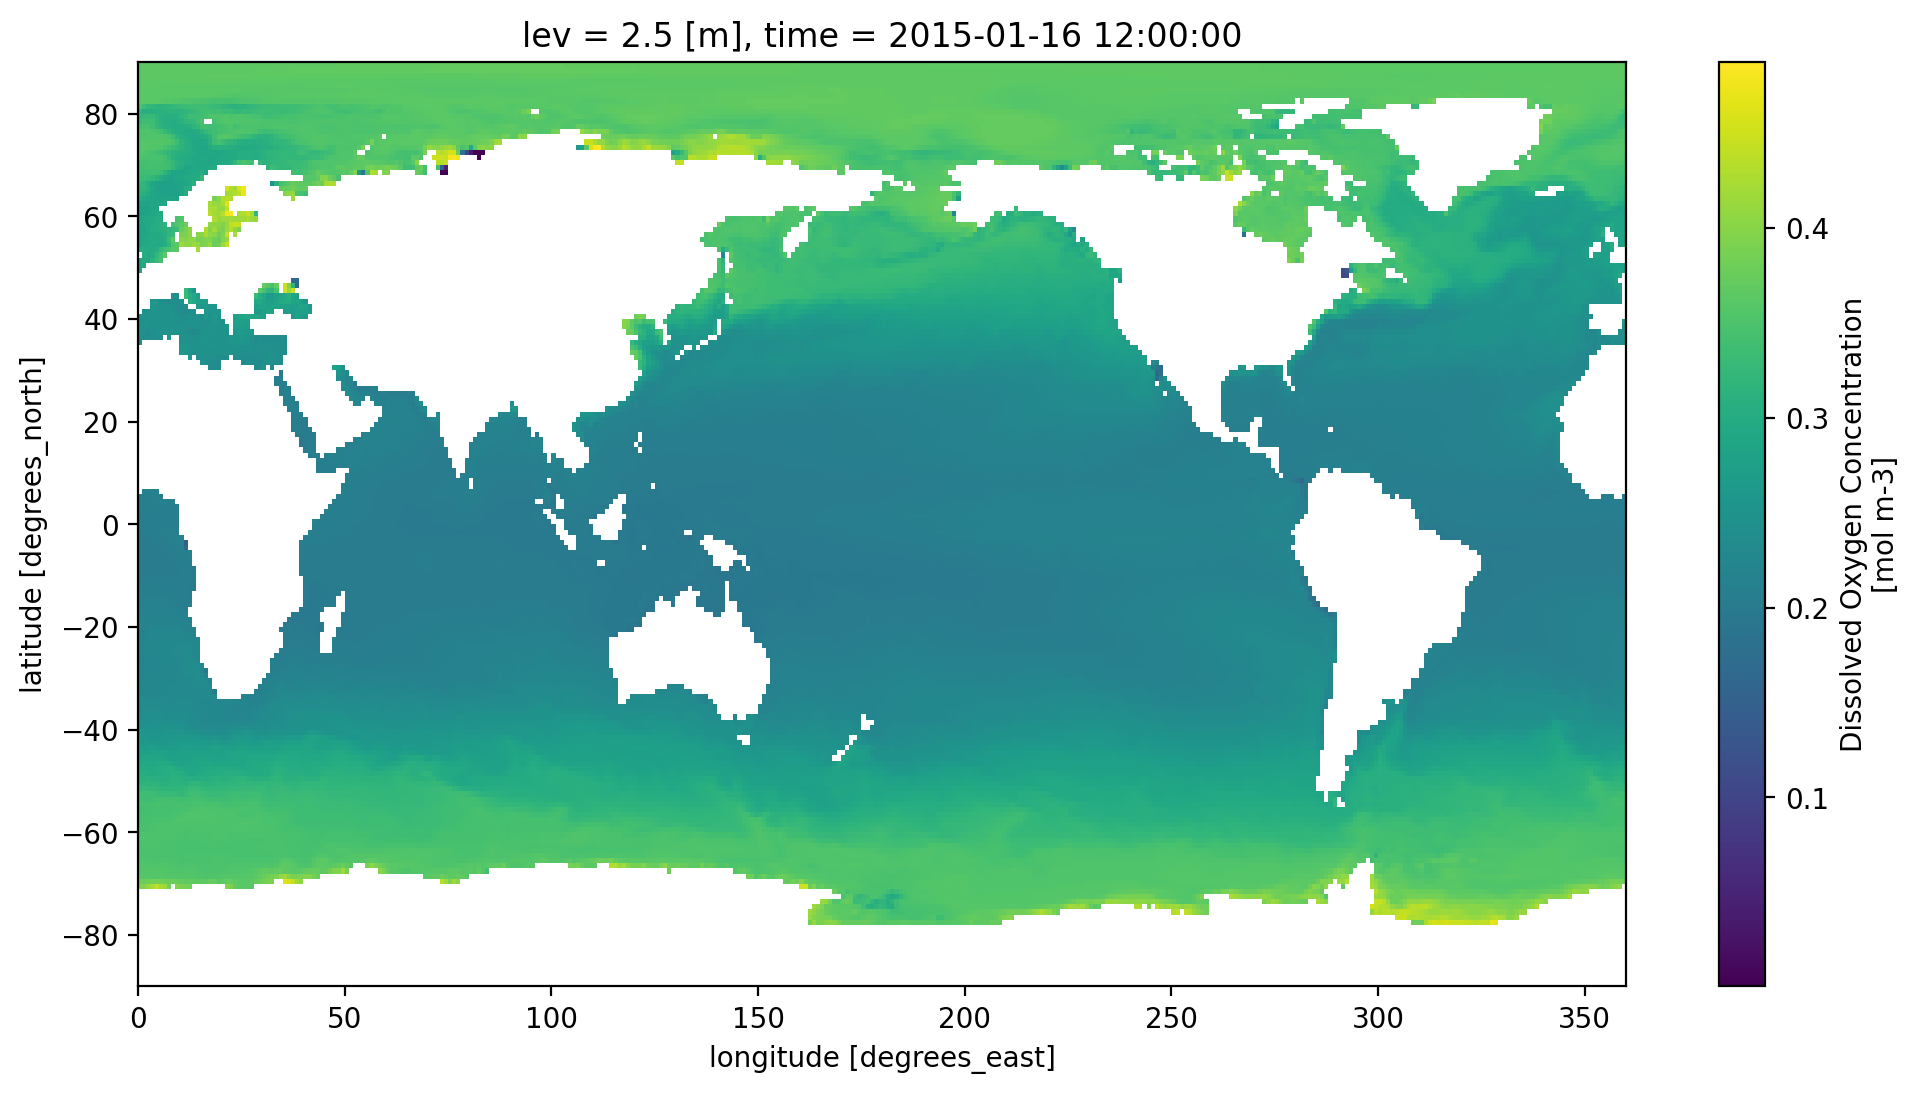

In [52]:
gfdl_esm4_do2_585.sel(time='2015-01-16').sel(lev=0,method='nearest').plot()

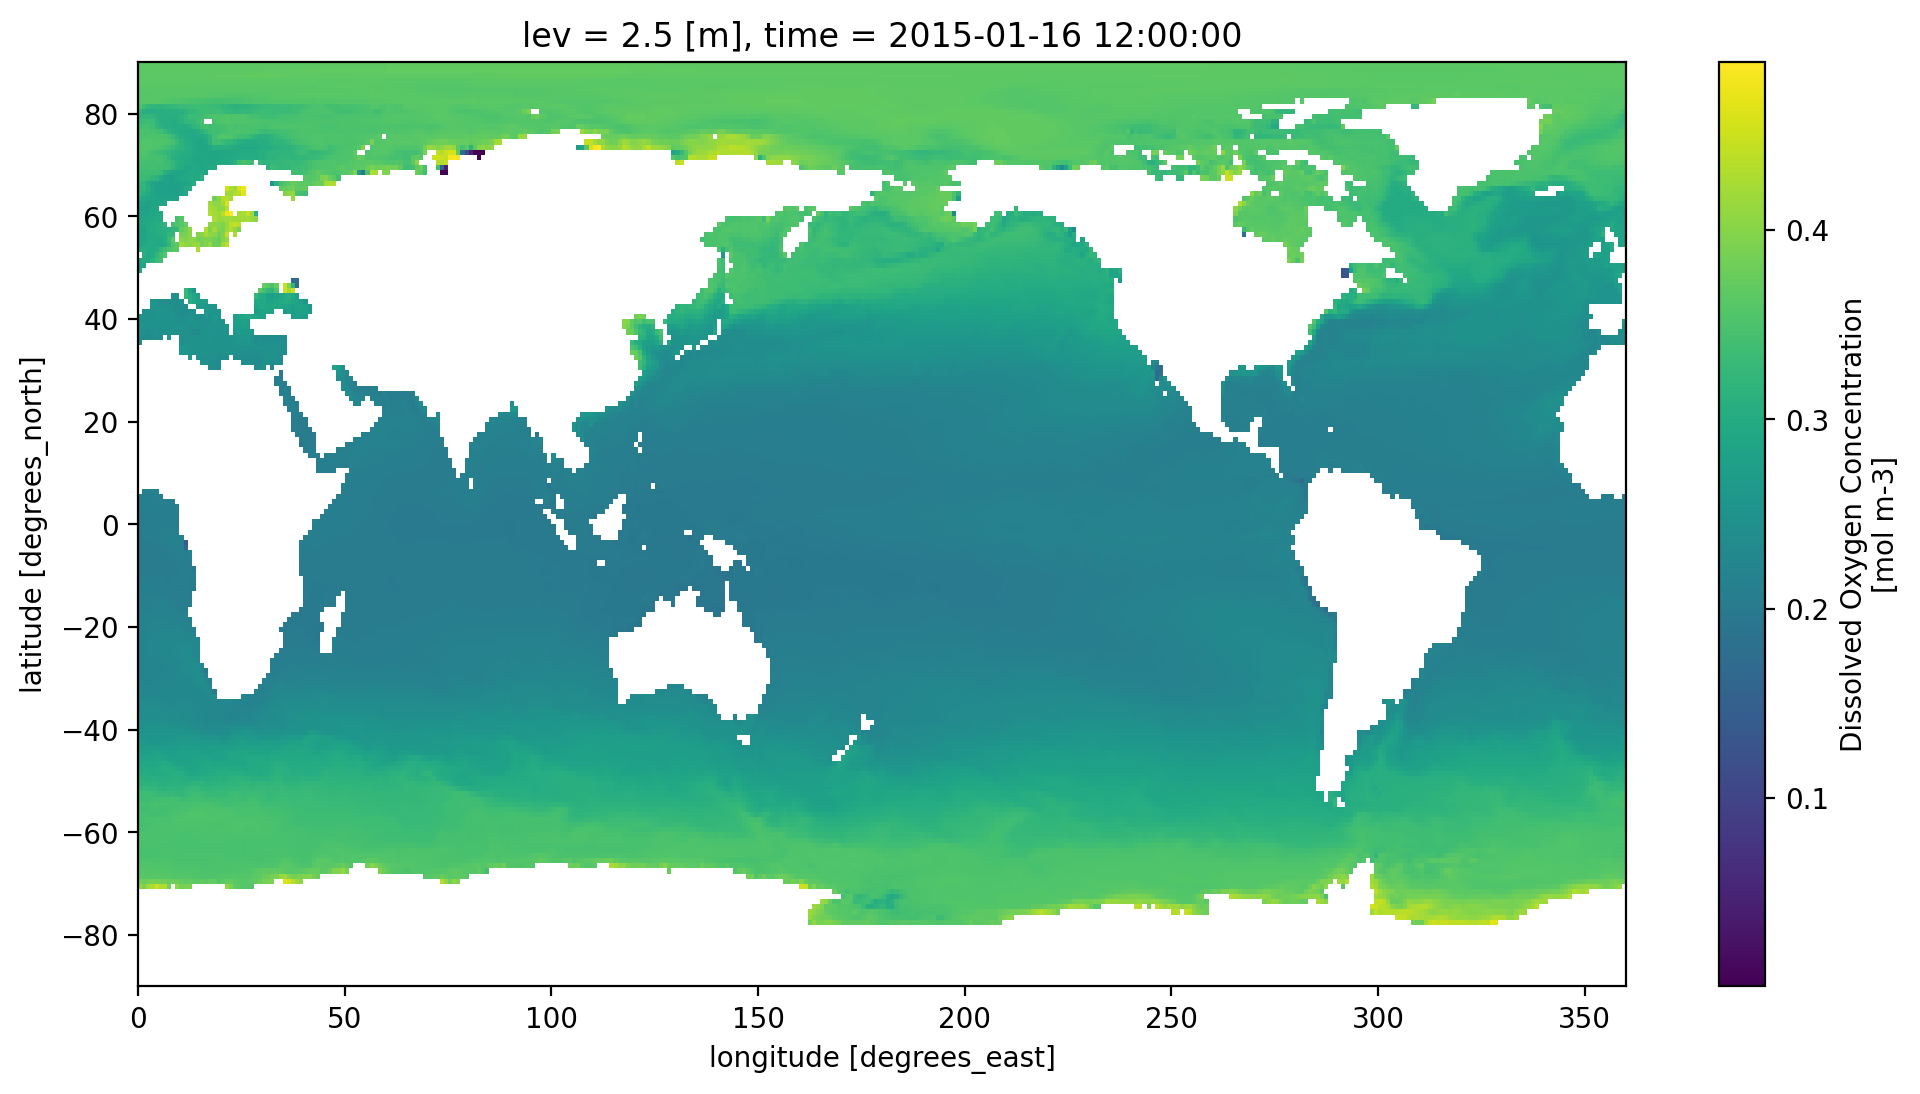

In [53]:
gfdl_esm4_do2_245.sel(time='2015-01-16').sel(lev=0,method='nearest').plot()

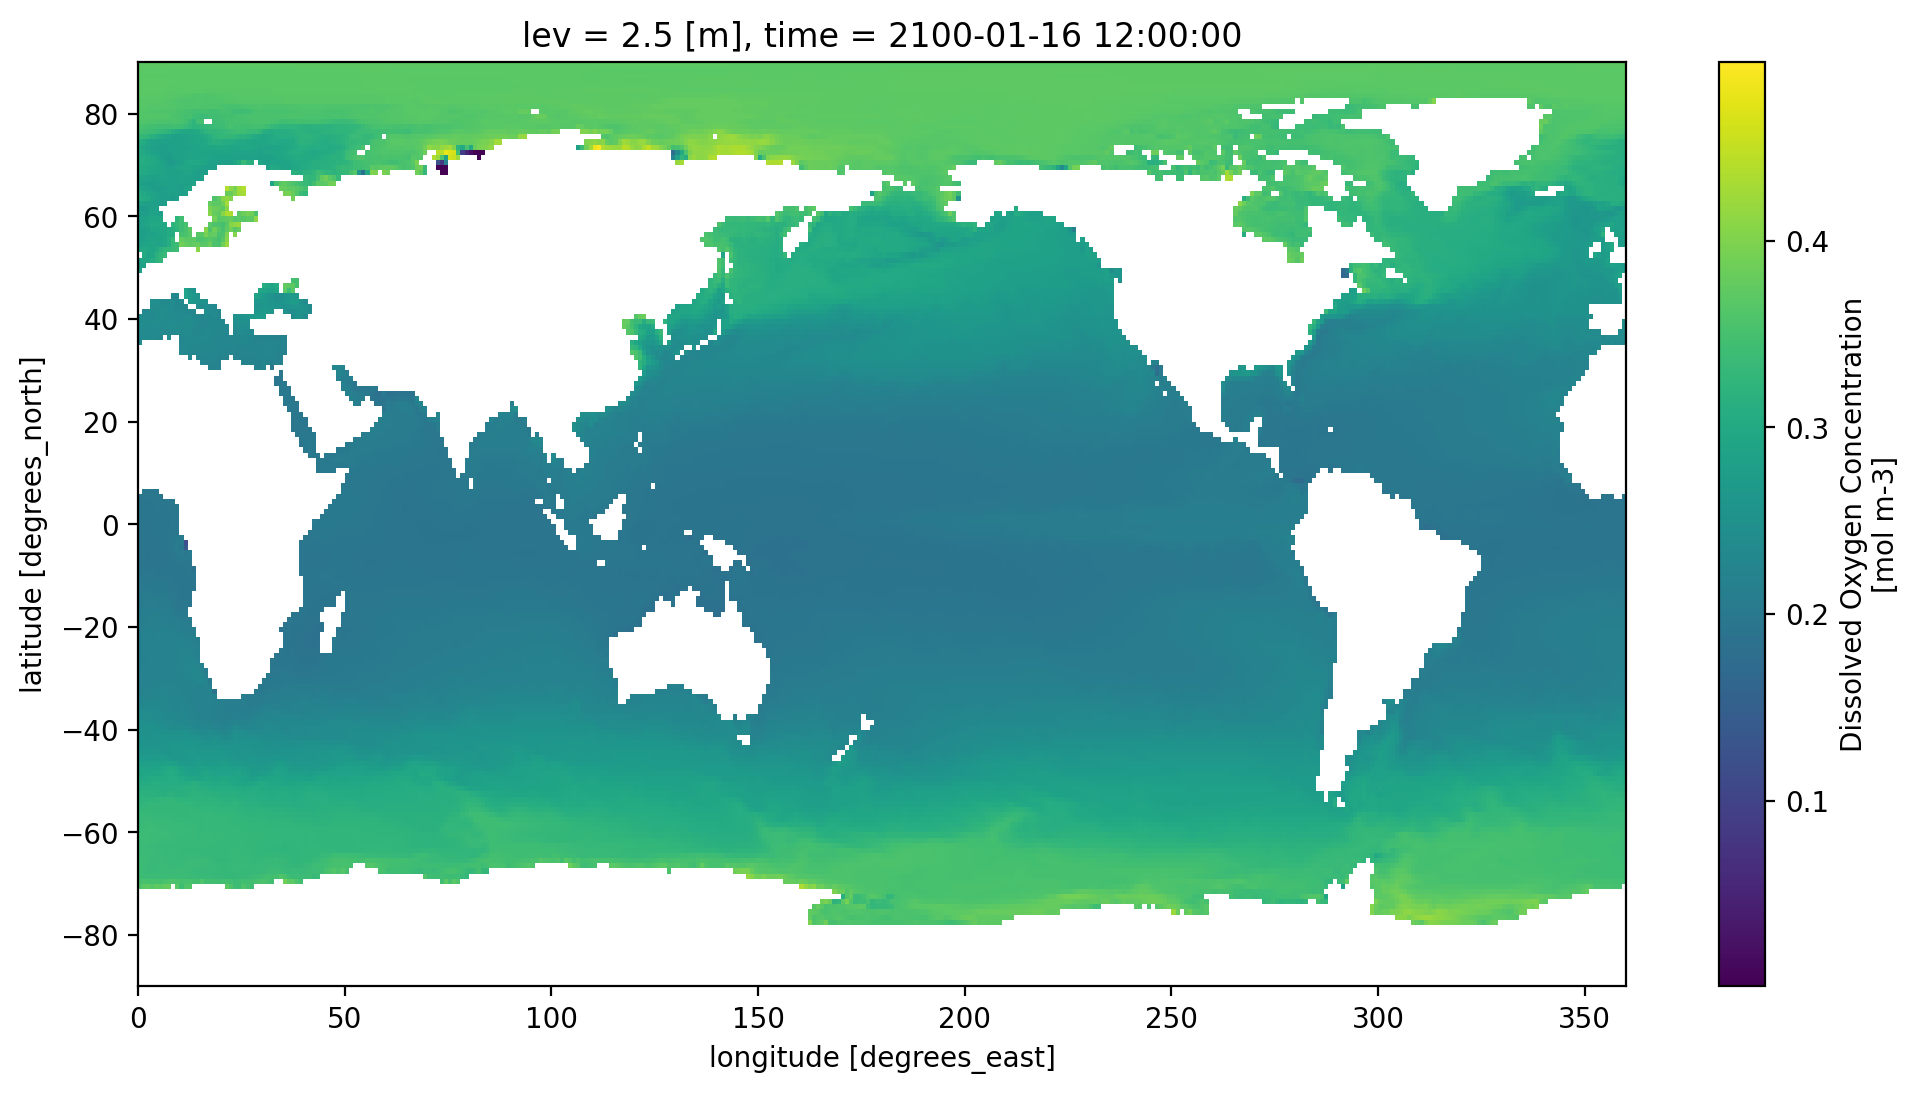

In [54]:
gfdl_esm4_do2_585.sel(time='2100-01-16').sel(lev=0,method='nearest').plot()

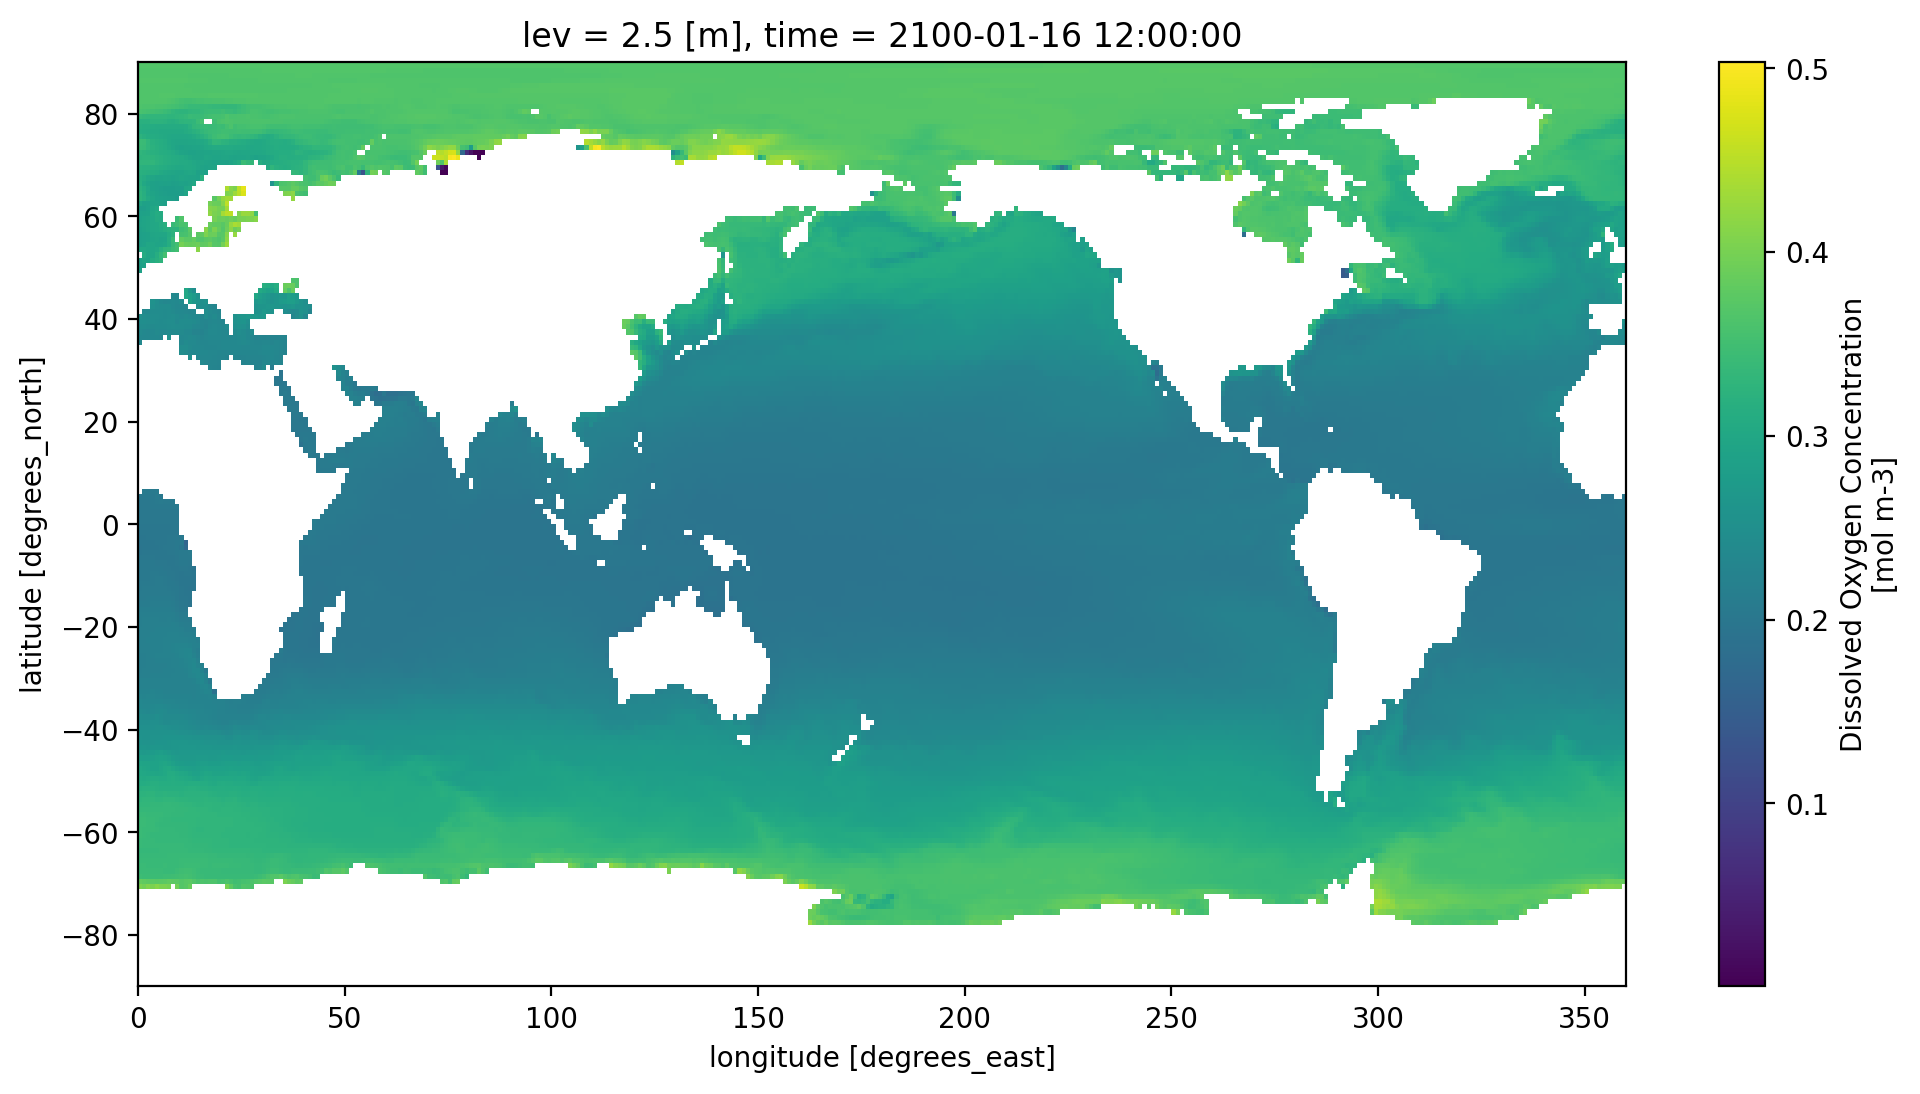

In [55]:
gfdl_esm4_do2_245.sel(time='2100-01-16').sel(lev=0,method='nearest').plot()

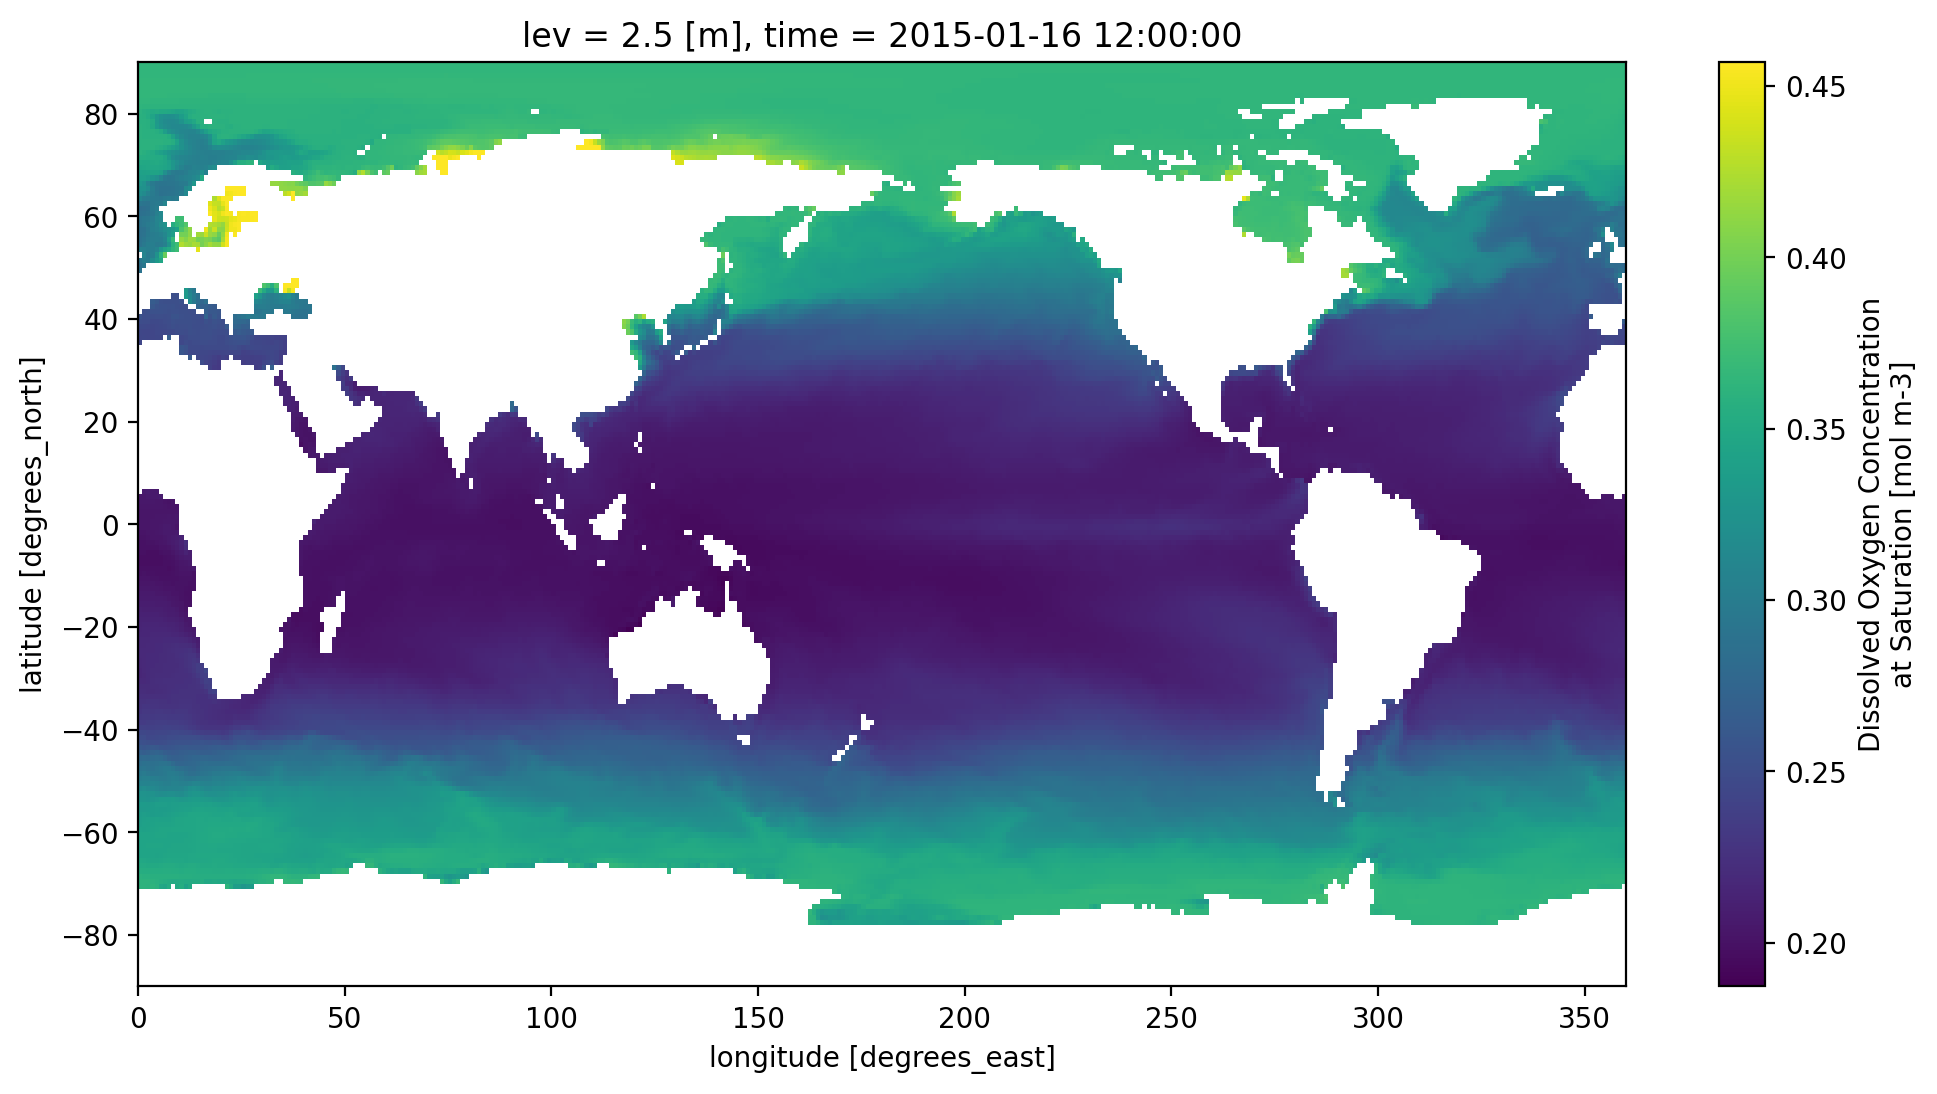

In [56]:
gfdl_esm4_o2_585.sel(time='2015-01-16').sel(lev=0,method='nearest').plot()

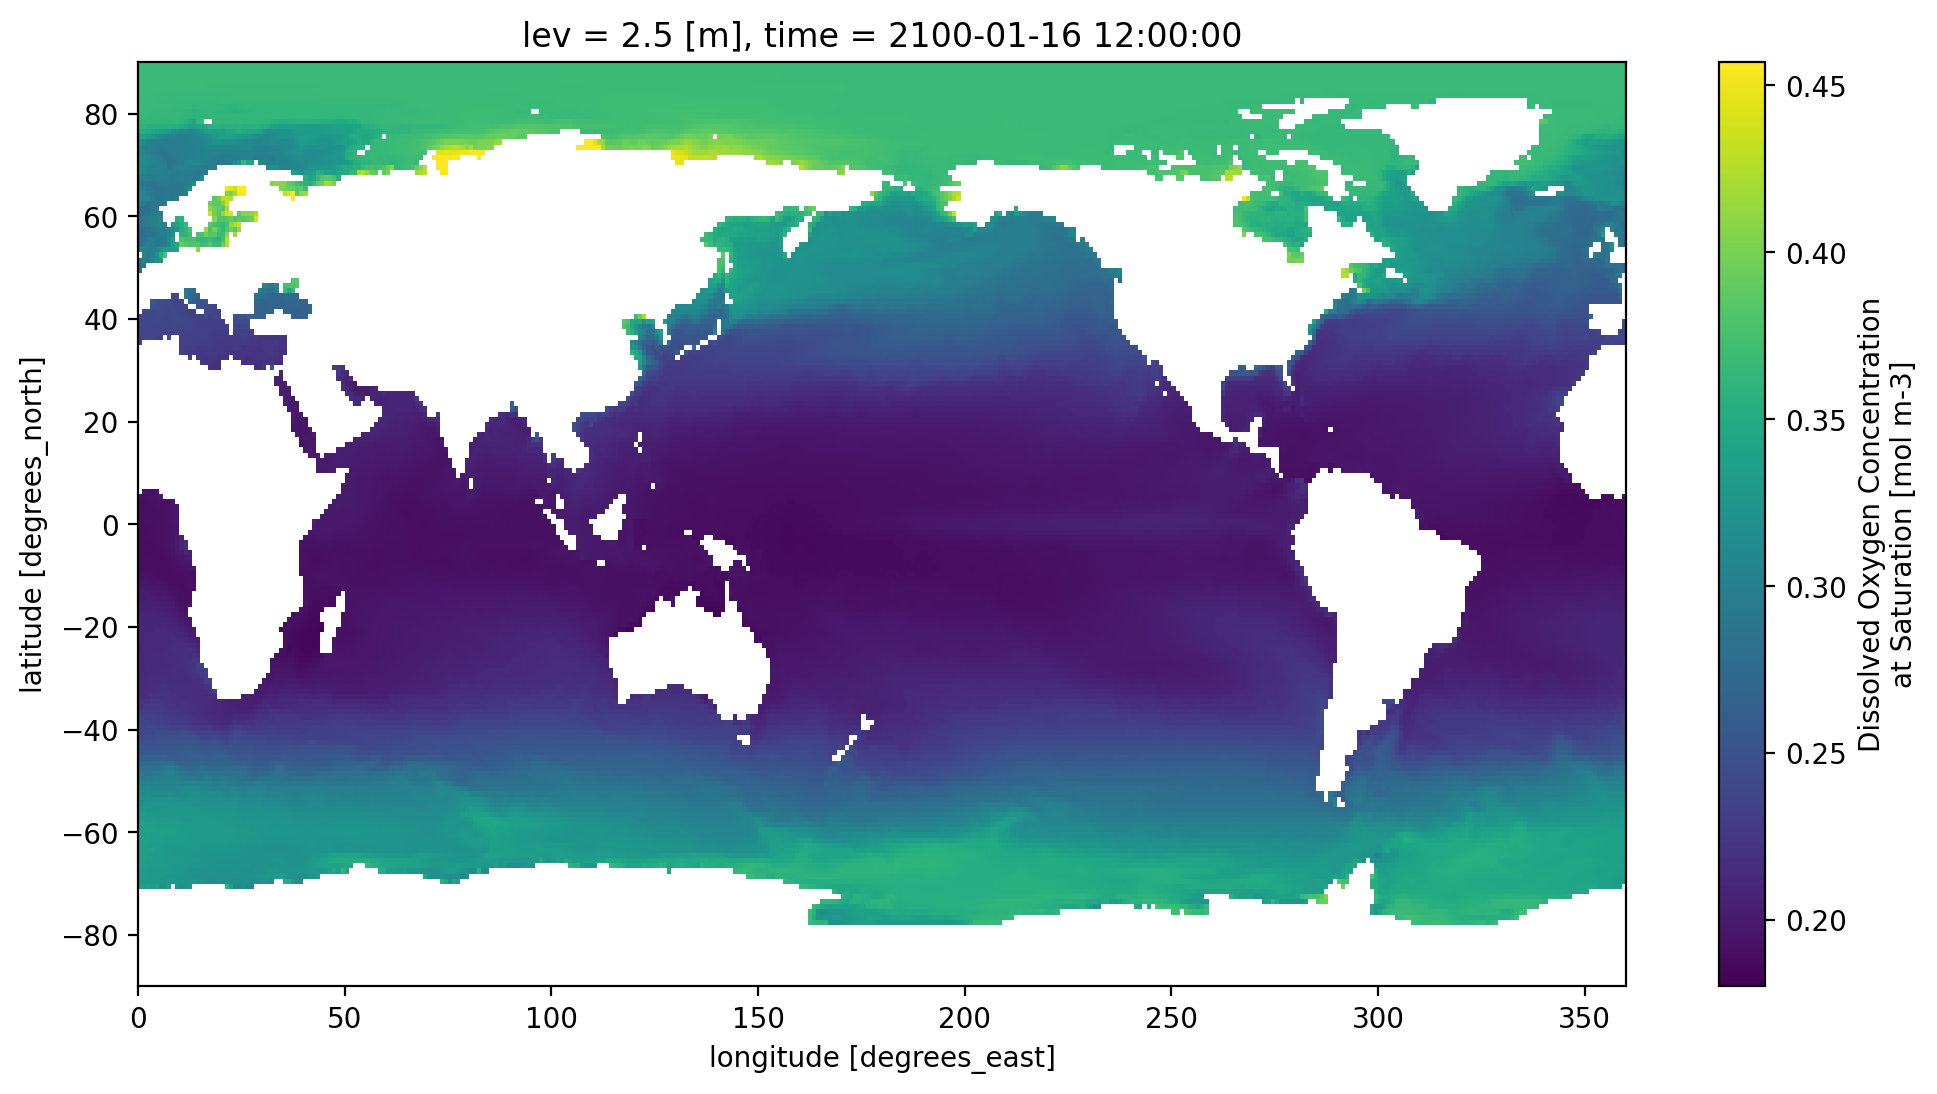

In [57]:
gfdl_esm4_o2_585.sel(time='2100-01-16').sel(lev=0,method='nearest').plot()

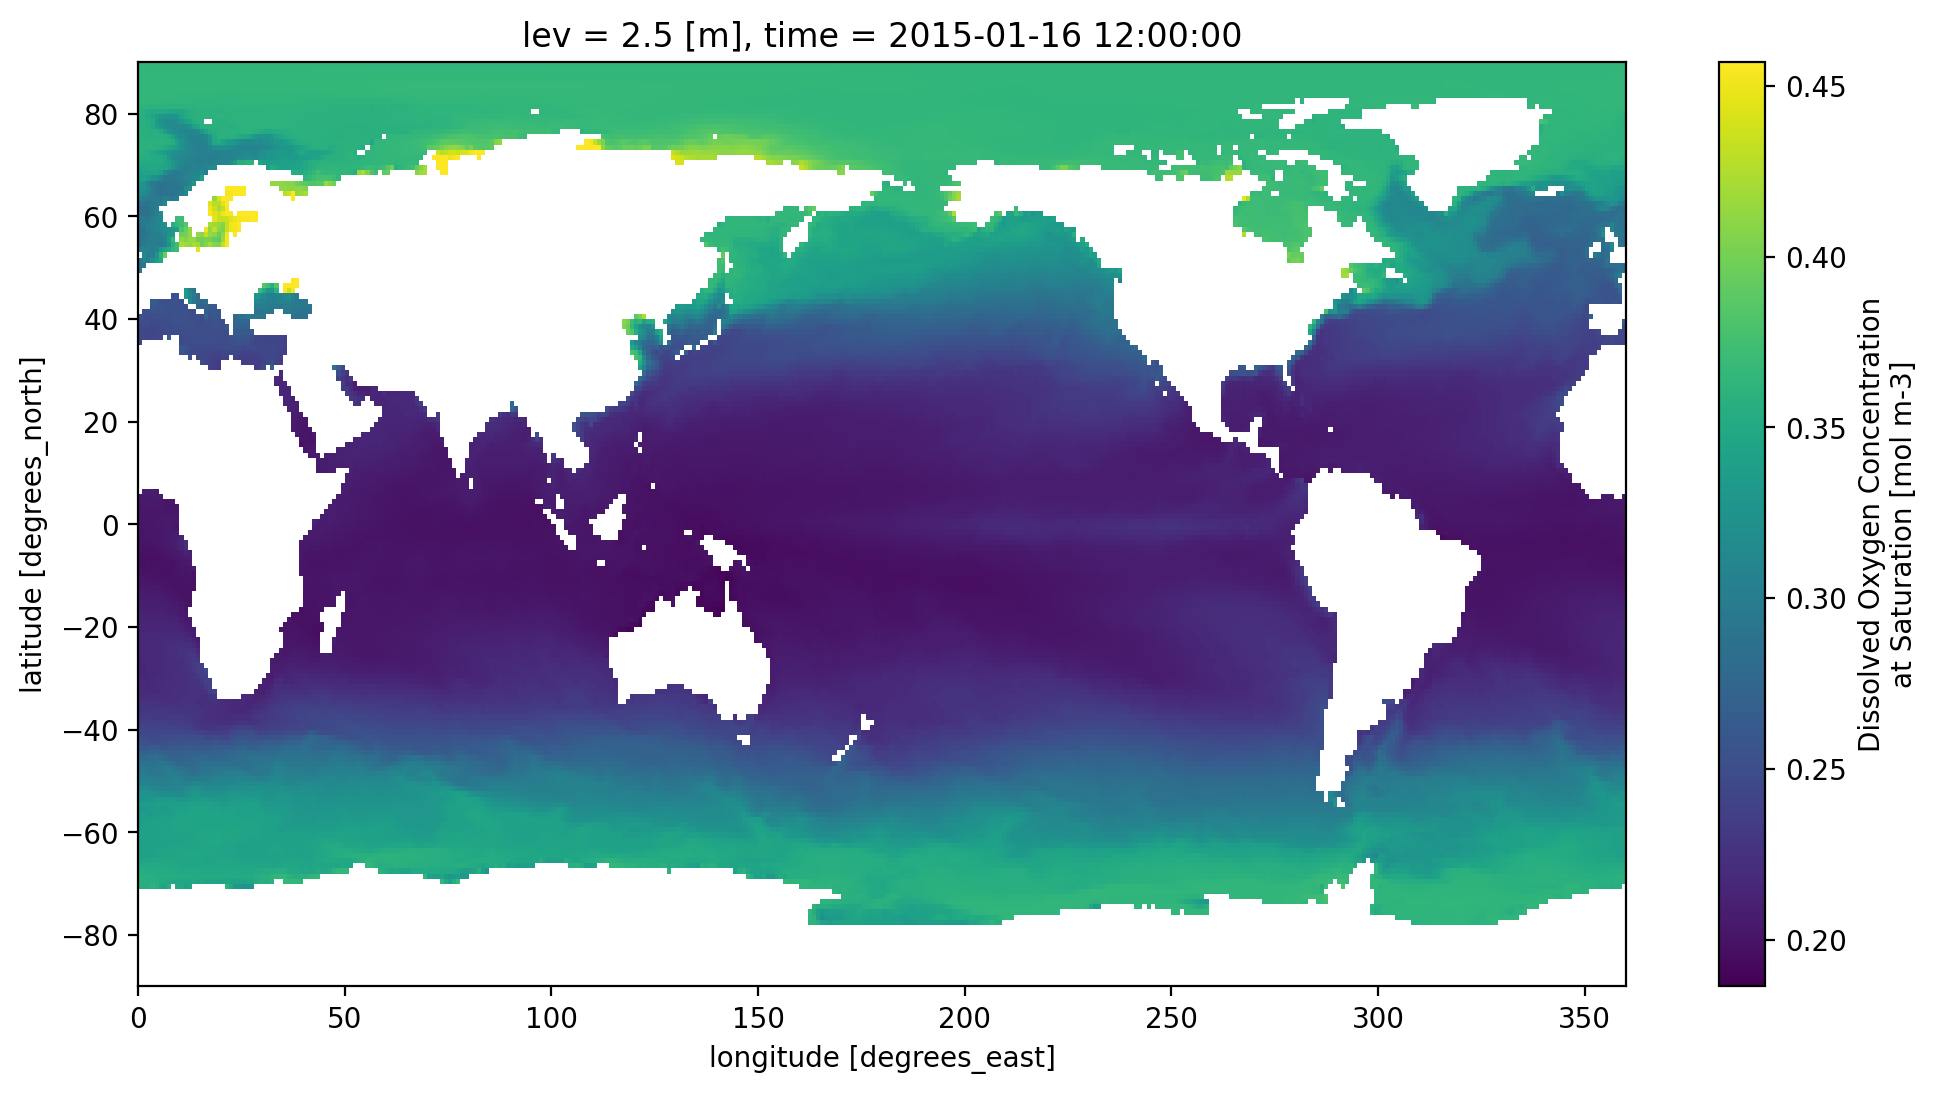

In [58]:
gfdl_esm4_o2_245.sel(time='2015-01-16').sel(lev=0,method='nearest').plot()

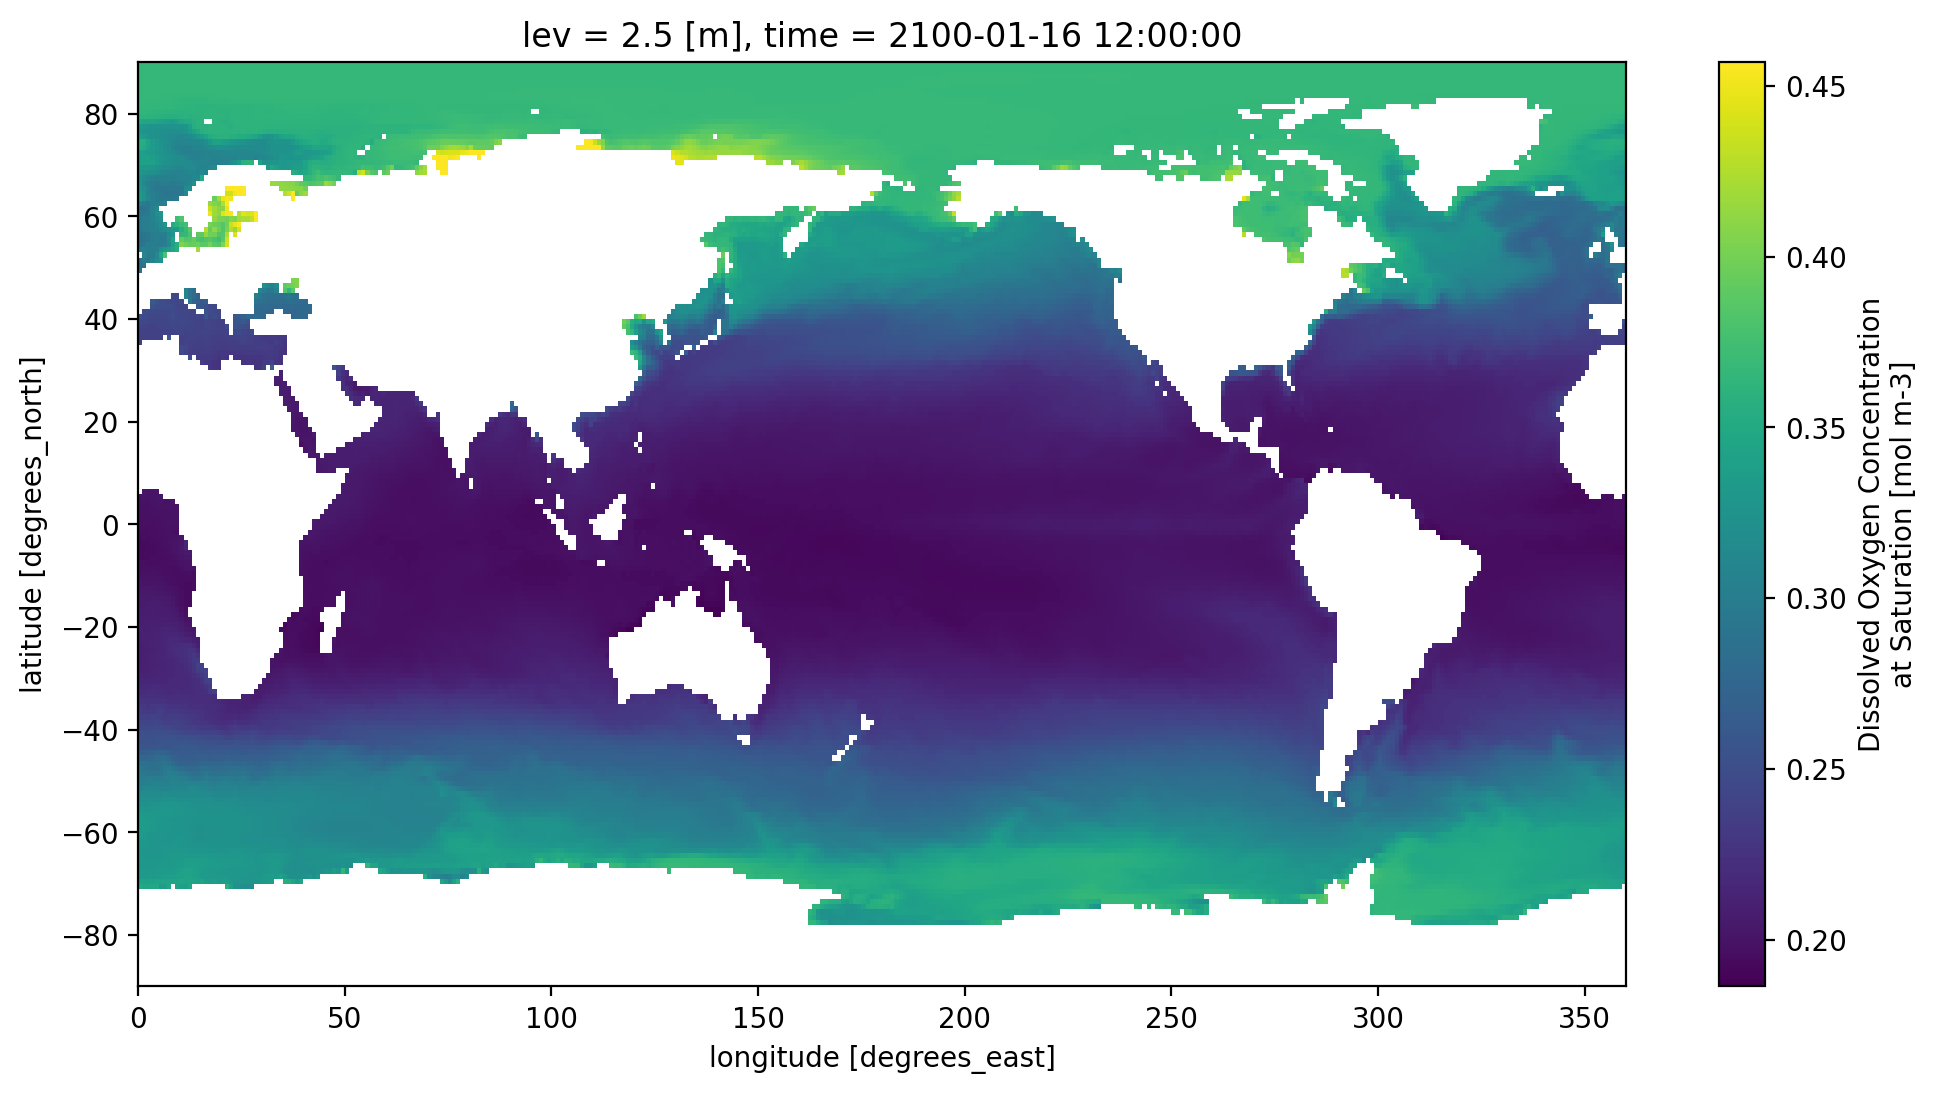

In [59]:
gfdl_esm4_o2_245.sel(time='2100-01-16').sel(lev=0,method='nearest').plot()

In [87]:
woa_aou = xr.open_zarr('C:/Users/TU_Climate24_Student/Desktop/ees_climate/undergrad_project2/data/woa18/woa_aou_all',
                      decode_times=False).aou
woa_aou

<xarray.DataArray 'aou' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-aou, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for Apparent_Oxygen_Util...
    standard_name:  Apparent_Oxygen_Utilization
    units:          micromoles_per_kilogram

In [88]:
woa_do2 = xr.open_zarr('C:/Users/TU_Climate24_Student/Desktop/ees_climate/undergrad_project2/data/woa18/woa_oxygen_dissolved_all',
                       decode_times=False).dissolved
woa_do2

<xarray.DataArray 'dissolved' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-dissolved, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for mole_concentration_o...
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          micromoles_per_kilogram

In [90]:
woa_o2 = xr.open_zarr('C:/Users/TU_Climate24_Student/Desktop/ees_climate/undergrad_project2/data/woa18/woa_oxygen_saturation_all',
                     decode_times=False).oxygen_saturation
woa_o2

<xarray.DataArray 'oxygen_saturation' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-oxygen_saturation, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for fractional_saturatio...
    standard_name:  fractional_saturation_of_oxygen_in_seawater
    units:          percent

In [103]:
esm4_basins = xr.open_dataset('C:/Users/TU_Climate24_Student/Desktop/ees_climate/undergrad_project2/data/basins/esm4_basins_gr.nc').basins
woa18_basins = xr.open_dataset('C:/Users/TU_Climate24_Student/Desktop/ees_climate/undergrad_project2/data/basins/woa18_basins_mask.nc',
                              decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

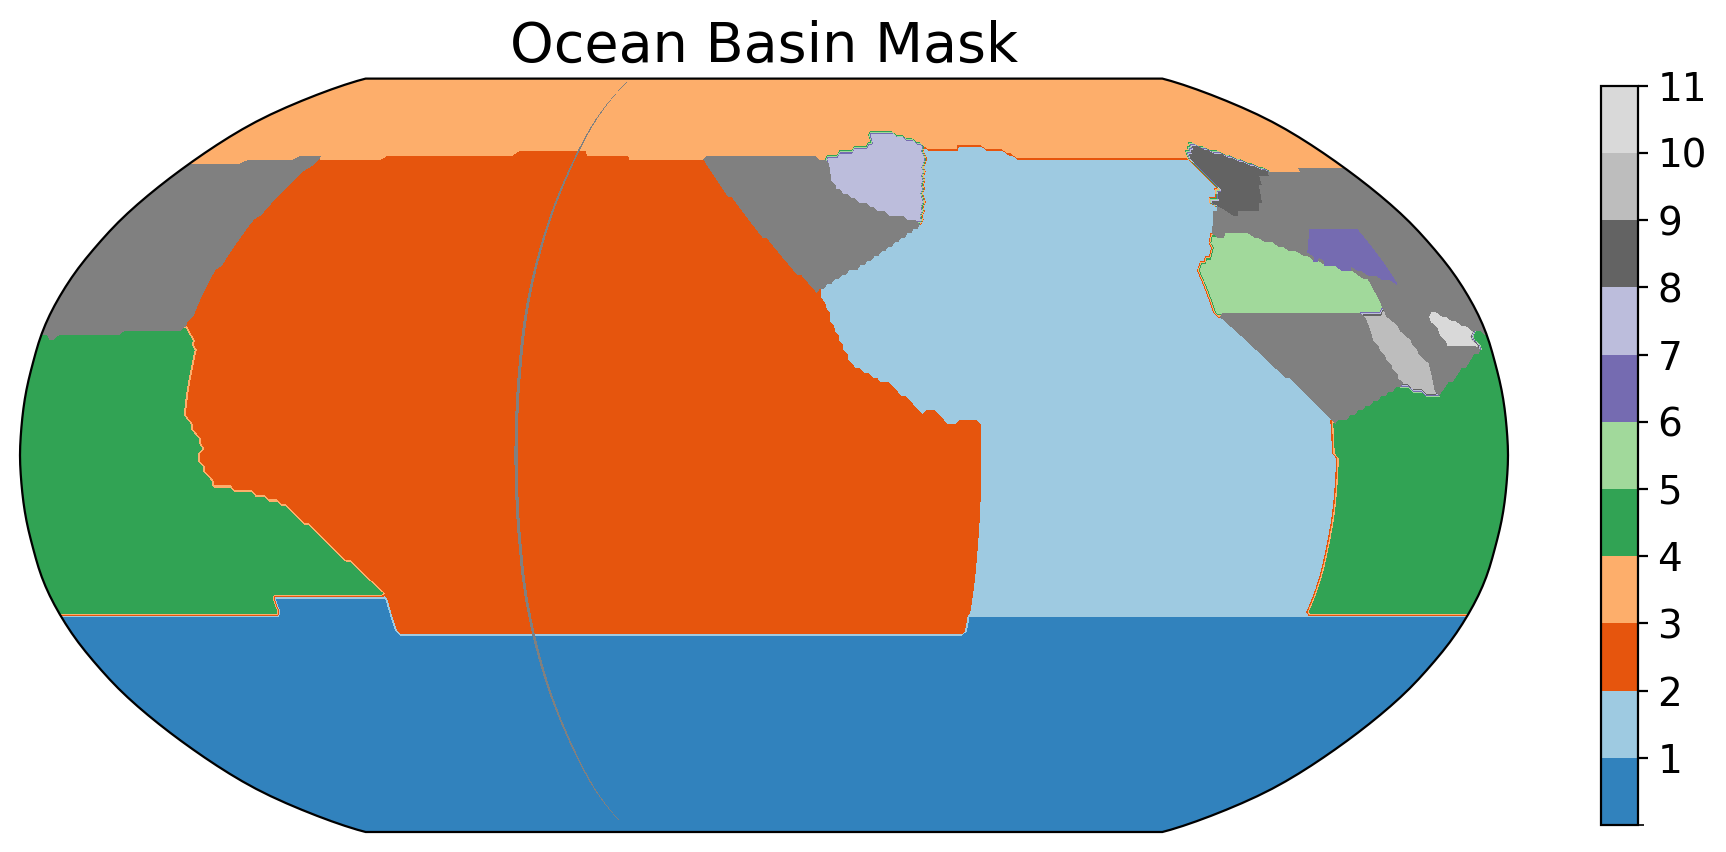

In [94]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [95]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere

Text(0.5, 1.0, 'Ocean Basin Mask')

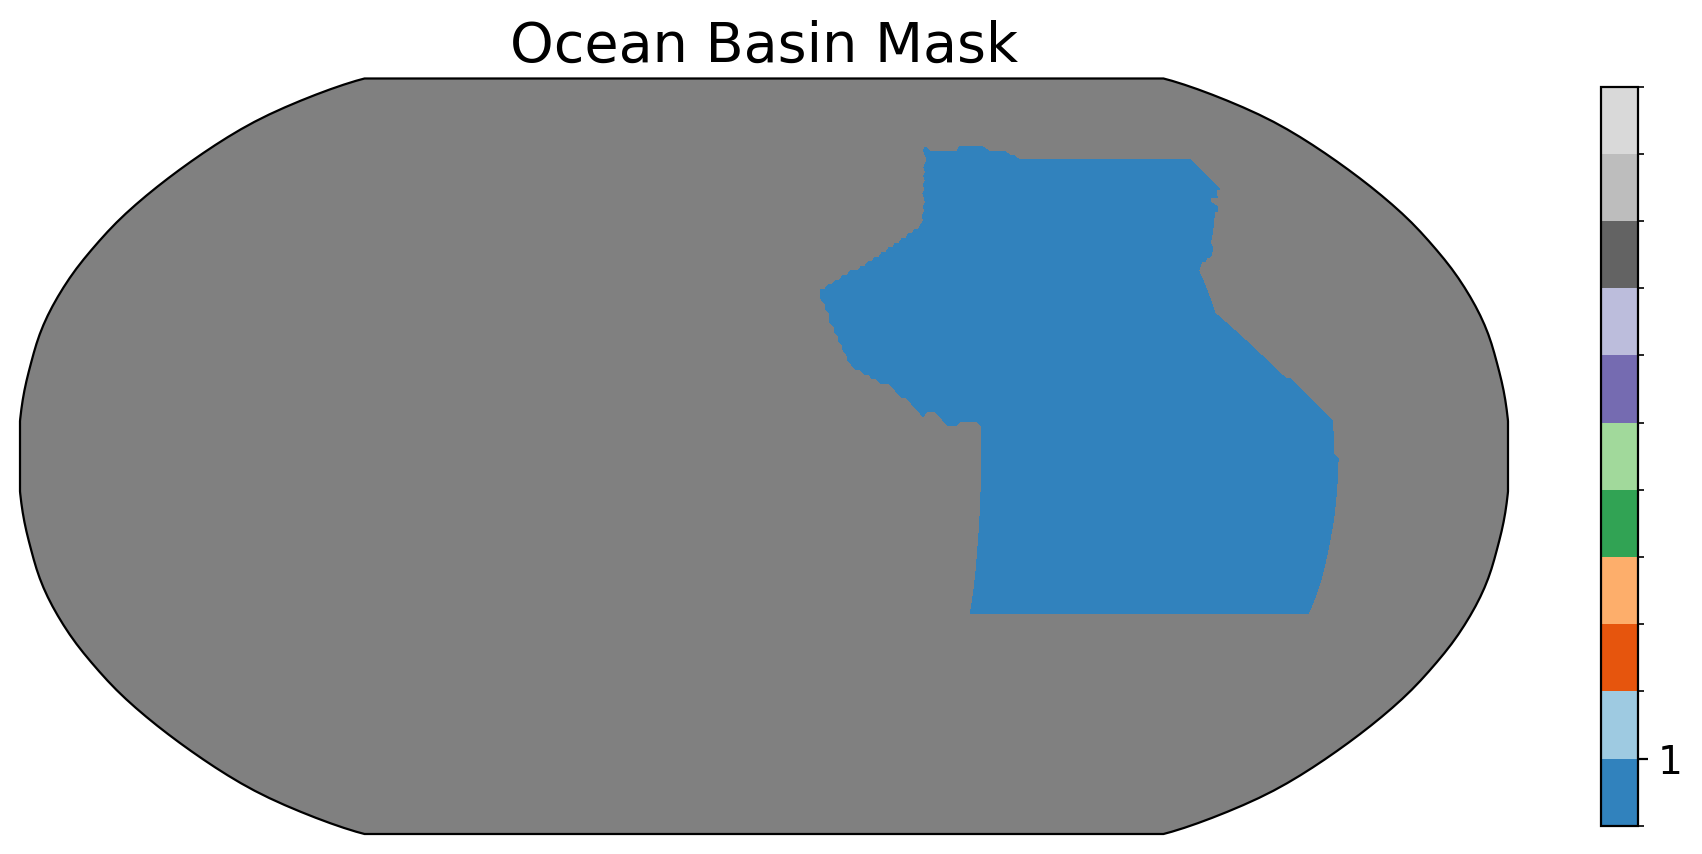

In [96]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = atlanticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

Text(0.5, 1.0, 'Ocean Basin Mask')

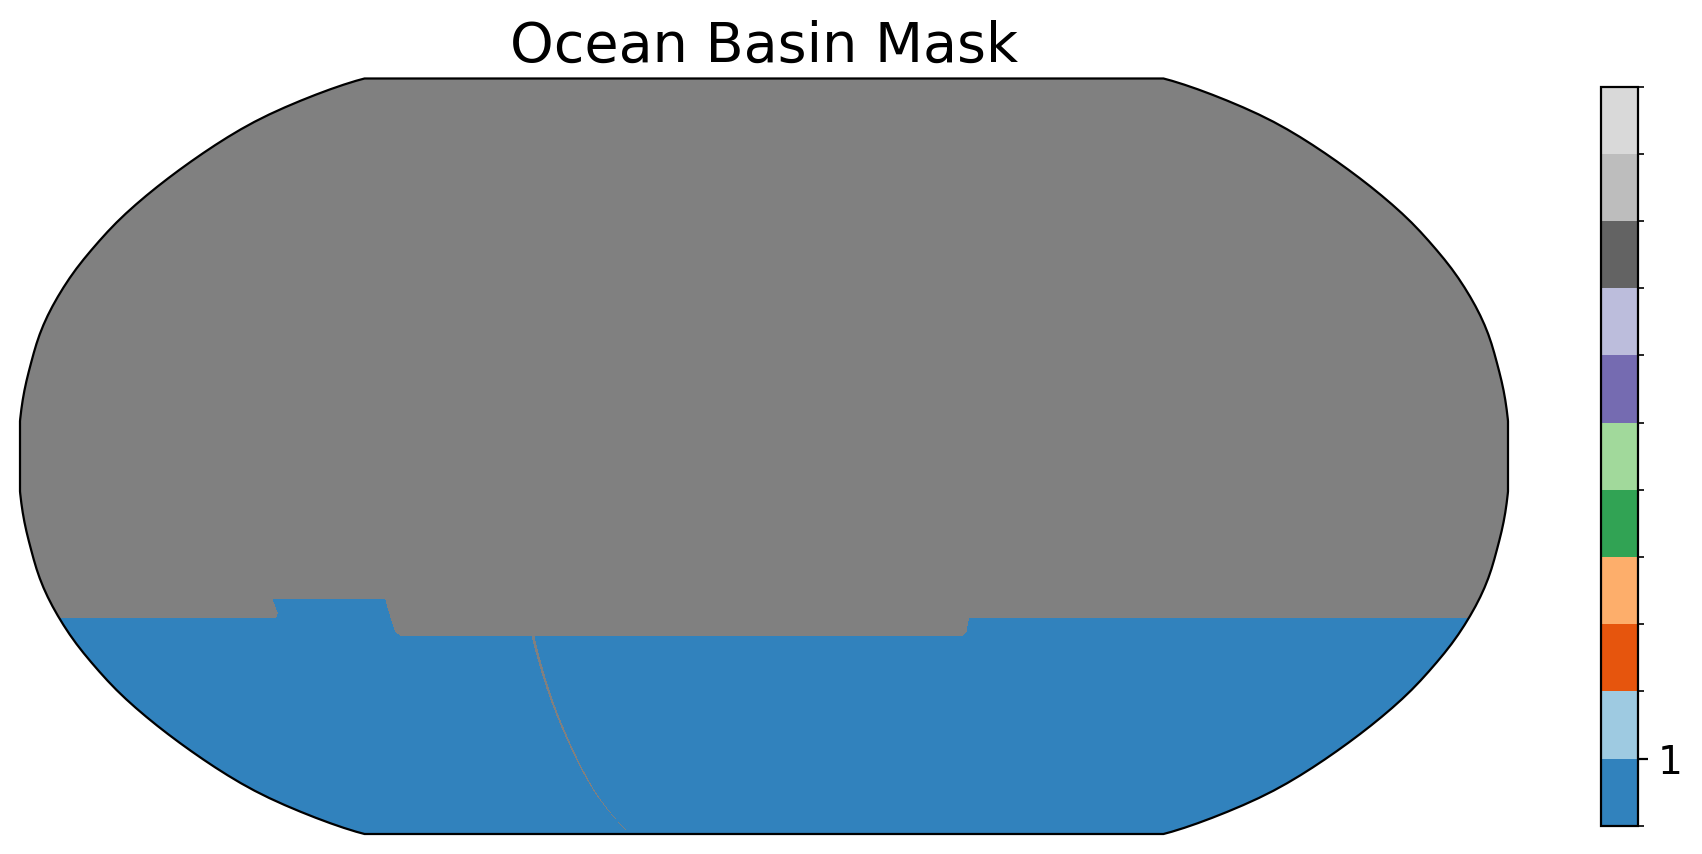

In [97]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [98]:
woa_aou_atlantic = woa_aou*atlanticocean

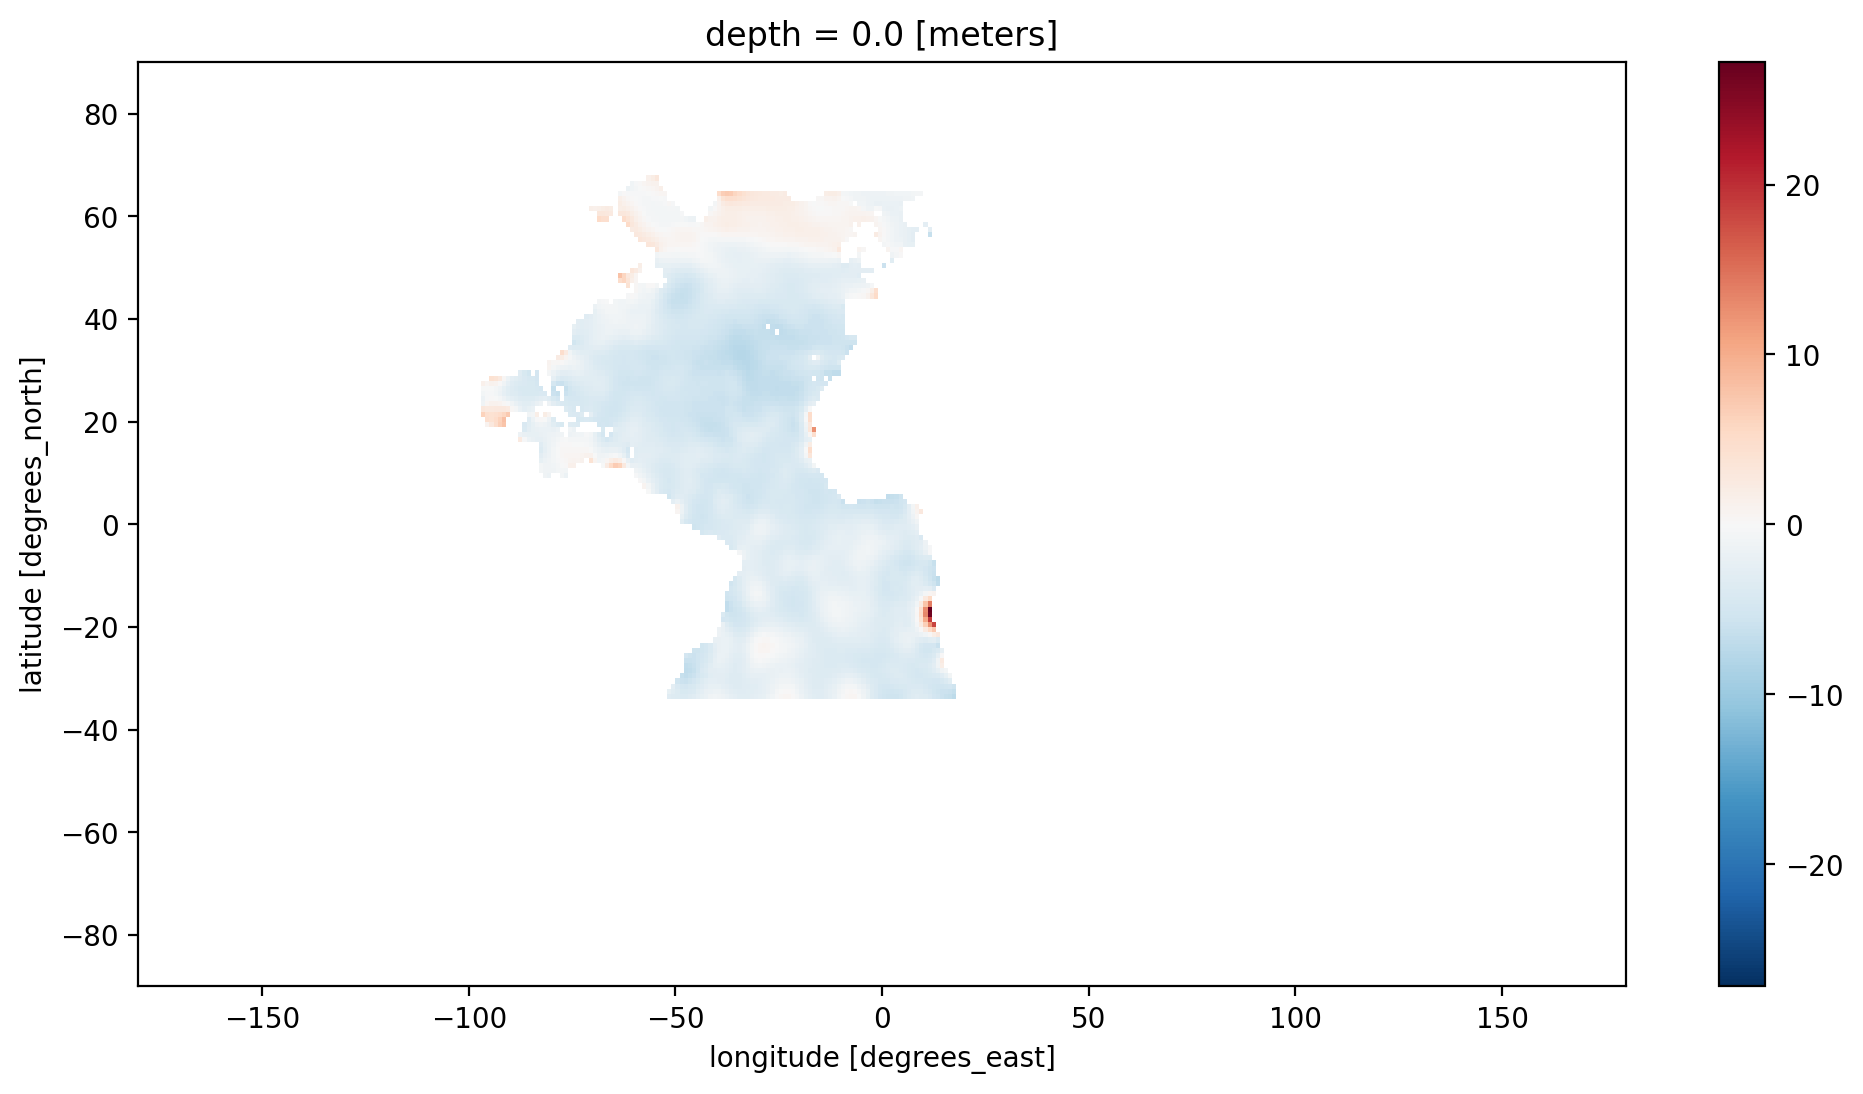

In [100]:
woa_aou_atlantic.isel(depth=0).plot()

Text(0.5, 1.0, 'WOA AOU [μmol/kg]')

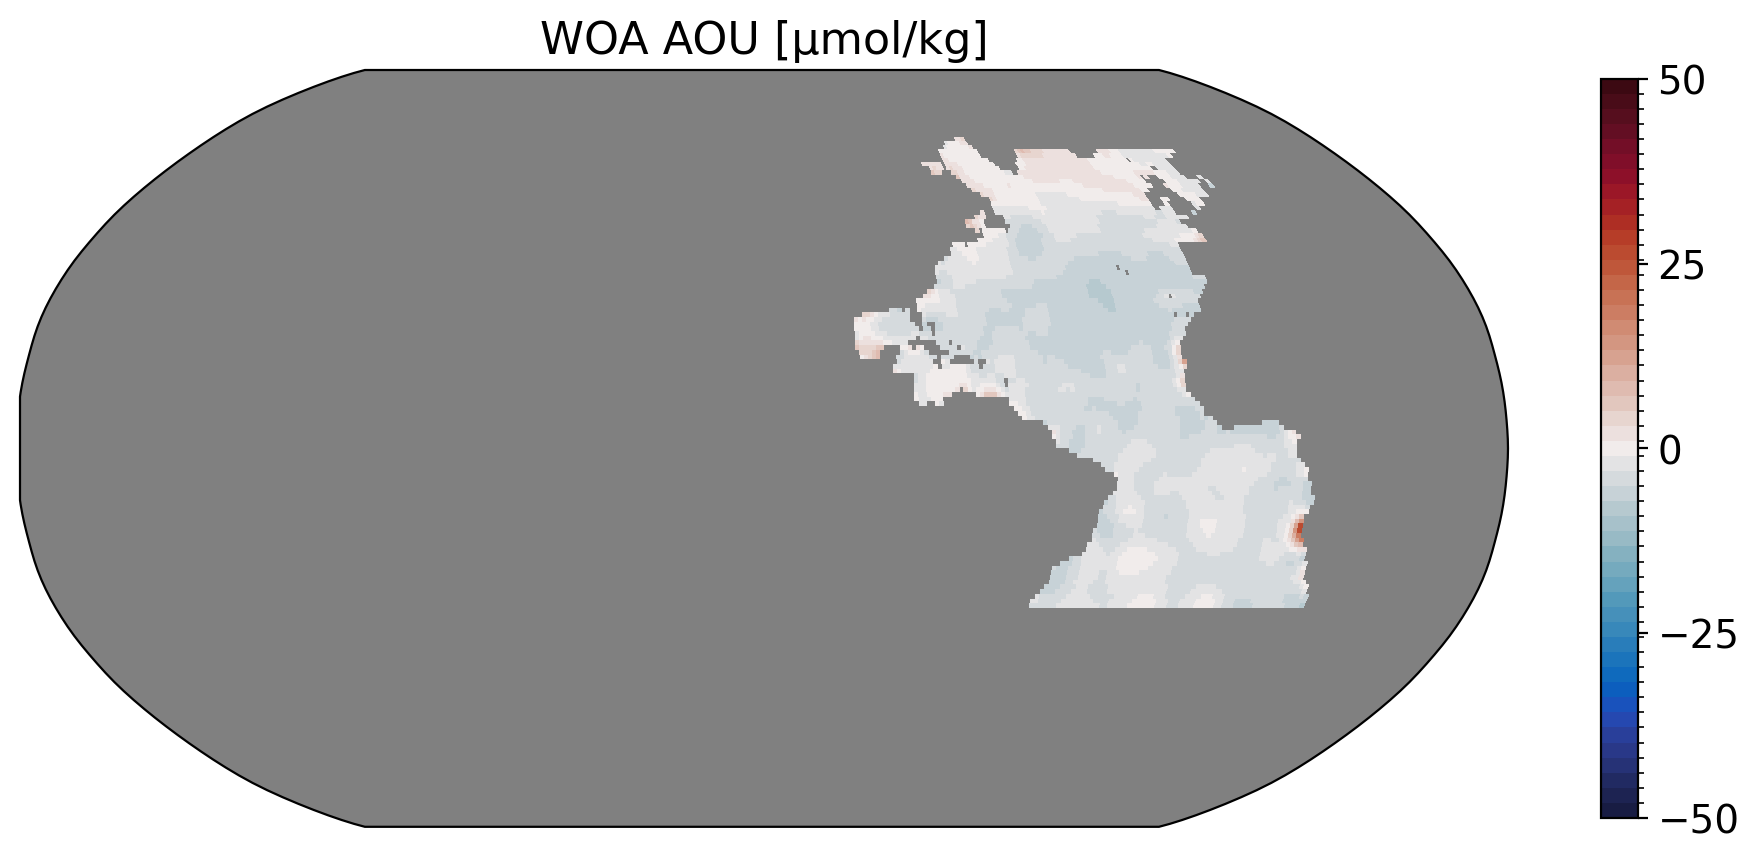

In [101]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa_aou_atlantic.isel(depth=0).plot(x='lon',y='lat',
                         cmap=cmocean.cm.balance, vmin=-50, vmax=50, levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[-50,-25,0,25,50], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("WOA AOU [μmol/kg]",fontsize=16)

Text(0.5, 1.0, 'Ocean Basin Mask')

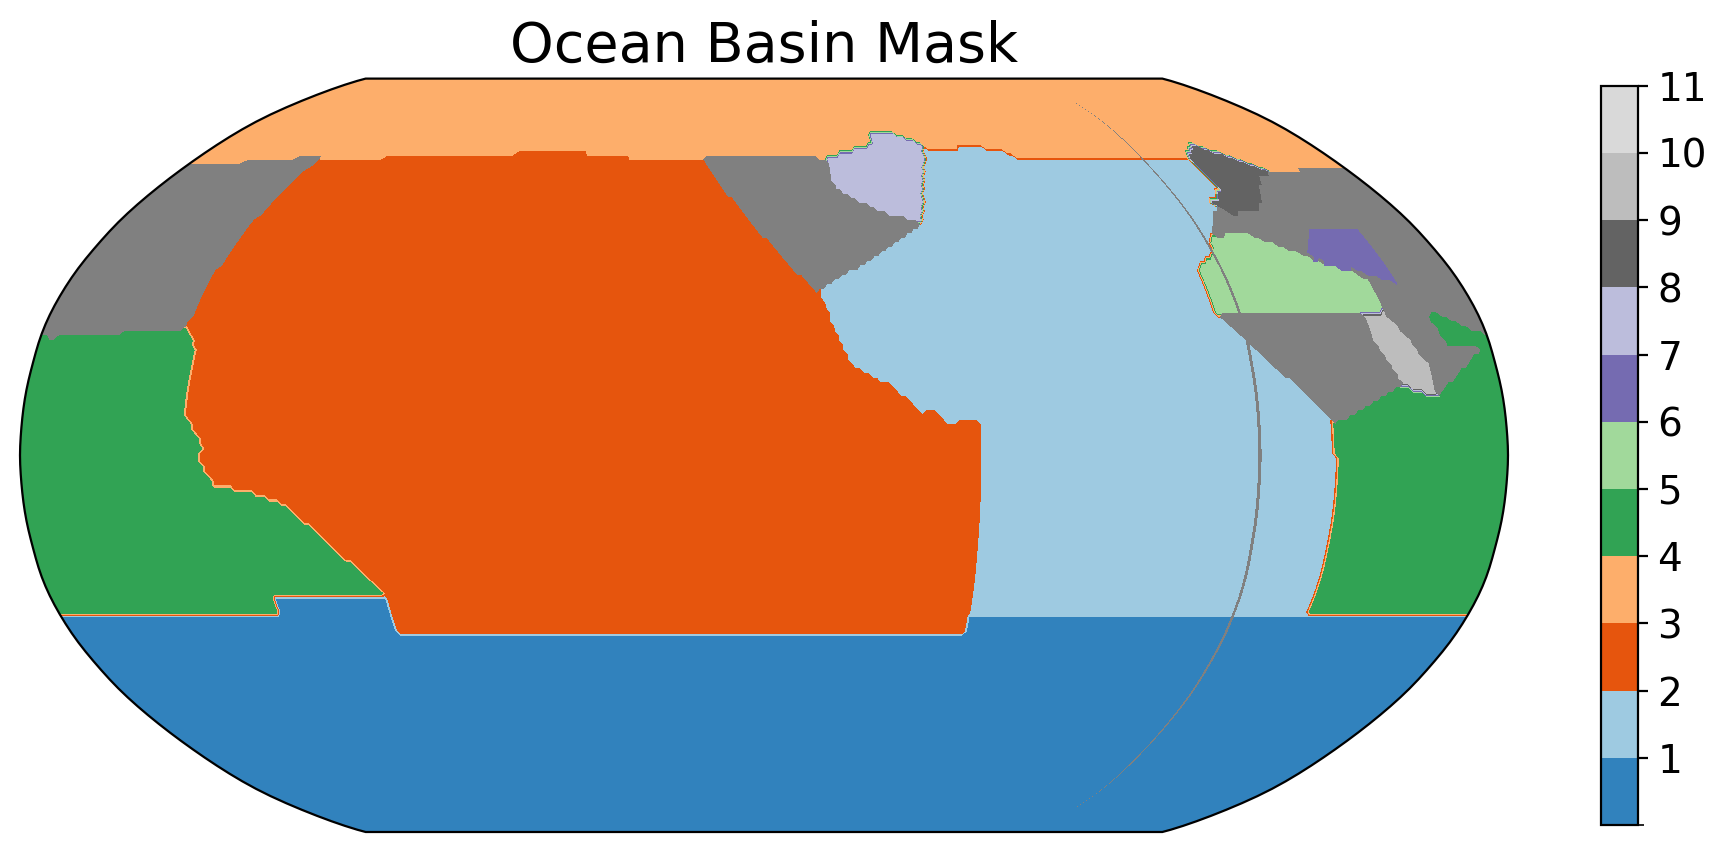

In [104]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)